In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read excel
def read_excel(path, sheet_name):
    df = pd.read_excel(path, sheet_name=sheet_name)
    return df

def draw_hex_contour(data, xindex, yindex):
    # Creating a hexbin plot with contours
    plt.close("all")
    plt.figure(figsize=(8, 6))

    # Create the hexbin plot
    hb = plt.hexbin(data[xindex], data[yindex], gridsize=30, cmap='Blues', mincnt=1)

    # Adding a color bar
    cb = plt.colorbar(hb)
    cb.set_label('Counts')

    # Adding titles and labels
    plt.title('Hexbin Contour Plot')
    plt.xlabel(xindex)
    plt.ylabel(yindex)
    plt.show()
    


In [4]:
df = read_excel("./Data_Collection_V3.xlsx", "Sheet1")

In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Data,Cement (kg/m3),Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Silica Fume (kg/m3),nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa)
1,0,200,180,774,1014,1.4,0,200,0,0,0,3,30,35.834
2,1,200,180,771,1014,1.7,0,192,8,0,0,3,30,37.017
3,2,200,180,771,1014,4,0,192,0,0,8,3,30,42.841
4,3,200,180,774,1014,1.4,0,200,0,0,0,7,30,47.391


In [6]:
# get columns names
column_names = list(df.iloc[0])[1:]
index_names = list(df.iloc[1:, 1])
print(column_names)

['Cement (kg/m3)', 'Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa)']


In [7]:
values = df.iloc[1:, 1:].to_numpy()
values

array([[200, 180, 774, ..., 3, 30, 35.833999999999996],
       [200, 180, 771, ..., 3, 30, 37.017],
       [200, 180, 771, ..., 3, 30, 42.841],
       ...,
       [525, 196, 695, ..., 28, 23, 76.52],
       [525, 196, 695, ..., 28, 23, 87.24],
       [525, 196, 695, ..., 28, 23, 91.87]], dtype=object)

In [41]:
# def feature_normalize(features):
#     mininum = features.min()
#     maximum = features.max()
#     return (features - mininum) / (maximum - mininum)
def feature_normalize(features):
    mean = features.mean()
    std = np.sqrt(features.var() + 1e-8)
    return (features - mean) / (std + 1e-8)


# values_norm = feature_normalize(values)

values_norm = values.copy()
for i in range(values.shape[1]):
    values_norm[:, i] = feature_normalize(values[:, i])


In [42]:
values = values_norm

In [43]:
y1 = values[:, -1]
print(y1)



[-0.6732278856614087 -0.6200148513861549 -0.3580429903387526
 -0.1533774738954695 -0.055138026002693824 0.20274052471584297
 0.6611912815487975 0.6775645228642605 0.7348708674683798
 0.7144043158240515 0.7307775571395142 0.788083901743633
 -1.3240642279510486 -1.2872244349912578 -1.0866522288768405
 -0.9720395396686018 -0.8983599537490199 -0.6896011269768713
 -0.36213630066761815 -0.34166974902329 -0.12881761192227528
 -0.06741795698929064 0.0021683186014254934 0.3050732829374848
 -0.1484744977872677 -0.30590951043594705 -0.46334452308462637
 -1.529404465877112 -0.9176569881565296 0.017956801298479264
 -1.043604998275473 -0.31040765365448075 0.7196671433897356
 -0.7107424001039795 0.3688119723441074 1.3629016236400535
 0.16189738429155712 1.1245000330577681 1.6687753625003456
 0.9355780178793526 1.5383292091628682 1.8172140887119574
 1.5698162116926038 1.8621955208972945 2.0466193928571754
 2.0061361038903724 2.4154671367769387 2.379481991028669
 2.5953928655182863 2.92825546368978 -1.

In [44]:
x = values[:, :12]

In [45]:
used_columns = column_names[1:]
print(used_columns)
new_df = pd.DataFrame(values[:, 1:], columns=used_columns, index=index_names)
new_df

['Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa)']


,Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Silica Fume (kg/m3),nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa)
200.0,0.396118,0.568661,-0.104891,-0.384904,-0.639482,3.063775,-0.295792,-0.374261,-0.473013,-0.476551,1.246115,-0.673228
200.0,0.396118,0.539555,-0.104891,-0.241755,-0.639482,2.922031,0.51127,-0.374261,-0.473013,-0.476551,1.246115,-0.620015
200.0,0.396118,0.539555,-0.104891,0.855727,-0.639482,2.922031,-0.295792,-0.374261,0.360936,-0.476551,1.246115,-0.358043
200.0,0.396118,0.568661,-0.104891,-0.384904,-0.639482,3.063775,-0.295792,-0.374261,-0.473013,-0.439756,1.246115,-0.153377
200.0,0.396118,0.539555,-0.104891,-0.241755,-0.639482,2.922031,0.51127,-0.374261,-0.473013,-0.439756,1.246115,-0.055138
...,...,...,...,...,...,...,...,...,...,...,...,...
525.0,1.009736,-0.197794,-2.636516,2.287226,0.129486,1.380562,-0.295792,-0.374261,0.347905,-0.439756,0.277332,1.335913
630.0,1.009736,-0.197794,-2.636516,1.619193,0.129486,-0.479831,-0.295792,-0.374261,-0.473013,-0.246581,0.277332,0.914887
525.0,1.009736,-0.197794,-2.636516,1.619193,0.129486,1.380562,-0.295792,-0.374261,-0.473013,-0.246581,0.277332,1.156887
525.0,1.009736,-0.197794,-2.636516,2.287226,0.129486,1.380562,-0.295792,-0.374261,-0.199373,-0.246581,0.277332,1.639088


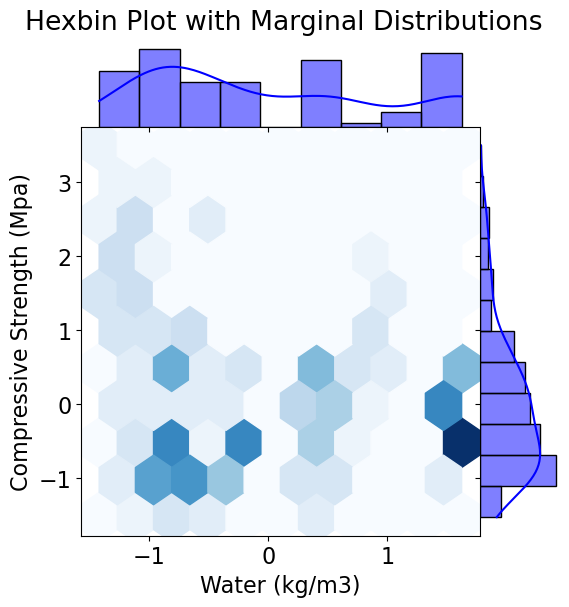

In [46]:
# draw hex_contour
def draw_hex_contour_marginal_dis(data, xindex, yindex):
    # Create the hexbin plot with marginal distributions
    g = sns.JointGrid(data=data, x=xindex, y=yindex, space=0)

    # Add the hexbin plot to the center
    g.plot_joint(plt.hexbin, gridsize=10, cmap='Blues')

    # Add the marginal histograms to the sides
#     g.plot_marginals(sns.histplot, kde=True, color="blue", bins=np.linspace(100,201, num=30))
    g.plot_marginals(sns.histplot, kde=True, color="blue")


    # Adding labels and title
    g.set_axis_labels(xindex, yindex)
    plt.suptitle("Hexbin Plot with Marginal Distributions", y=1.02)

    # Show the plot
    plt.show()

draw_hex_contour_marginal_dis(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa)")

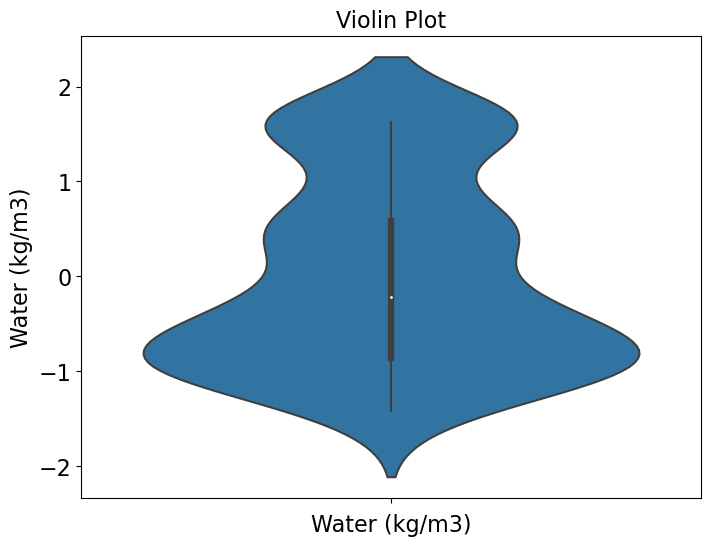

In [47]:
def draw_violin(data, xindex, yindex):
    # Create a violin plot
    plt.close("all")
    plt.figure(figsize=(8, 6))
    new_data = data.fillna(0)
    sns.violinplot(data=new_data, y=xindex)

    # Adding title and labels
    plt.title("Violin Plot")
    plt.xlabel(xindex)
#     plt.ylabel(yindex)
    
draw_violin(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa)")

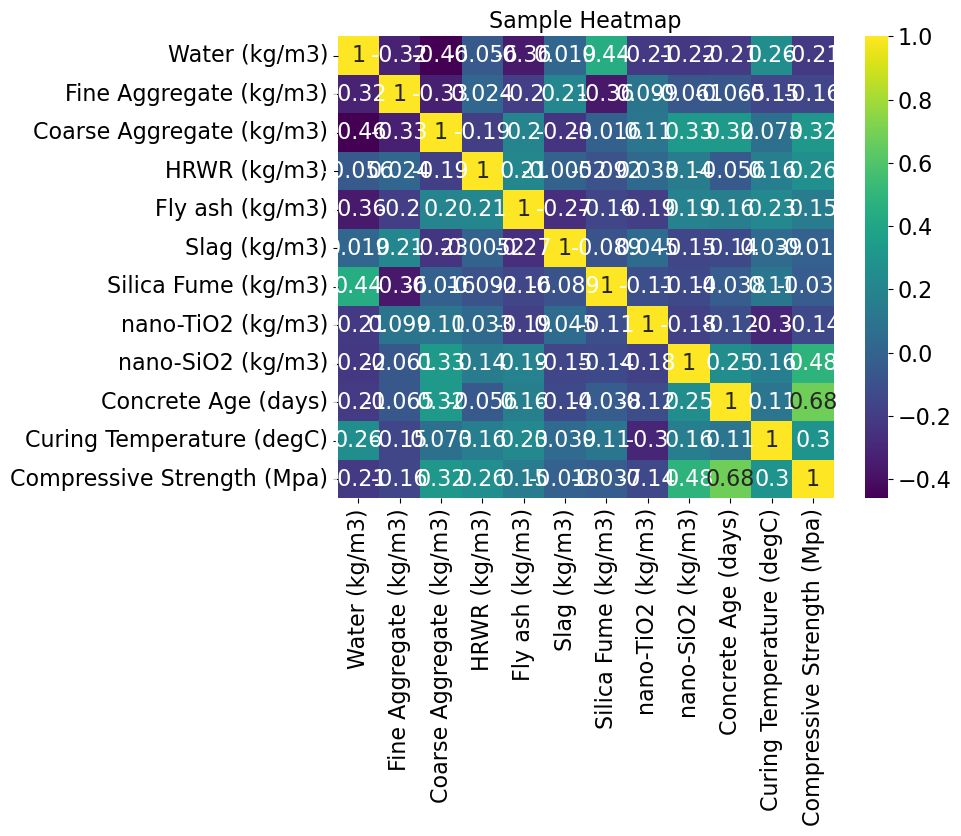

In [48]:
def draw_heatmap(data, xindex, yindex):
    # Create the heatmap
    new_data = data.fillna(0)
    corr_matrix = new_data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="viridis")

    # Adding title and labels
    plt.title("Sample Heatmap")
#     plt.xlabel(xindex)
#     plt.ylabel(yindex)

draw_heatmap(new_df, 'Water (kg/m3)', "Compressive Strength (Mpa)")

In [49]:
x = values[:, :-1]
y = values[:, [-1]]

In [50]:
x

array([[-1.2988704732018777, 0.3961182730039443, 0.5686608680697222, ...,
        -0.4730127499488369, -0.47655092093784046, 1.2461150129513017],
       [-1.2988704732018777, 0.3961182730039443, 0.5395549959957218, ...,
        -0.4730127499488369, -0.47655092093784046, 1.2461150129513017],
       [-1.2988704732018777, 0.3961182730039443, 0.5395549959957218, ...,
        0.3609357404502932, -0.47655092093784046, 1.2461150129513017],
       ...,
       [1.7137717661594292, 1.0097360035859675, -0.1977937632122981, ...,
        -0.4730127499488369, -0.24658116430085825, 0.27733247646446924],
       [1.7137717661594292, 1.0097360035859675, -0.1977937632122981, ...,
        -0.1993734015366223, -0.24658116430085825, 0.27733247646446924],
       [1.7137717661594292, 1.0097360035859675, -0.1977937632122981, ...,
        0.34790529528780684, -0.24658116430085825, 0.27733247646446924]],
      dtype=object)

In [51]:
y

array([[-0.6732278856614087],
       [-0.6200148513861549],
       [-0.3580429903387526],
       [-0.1533774738954695],
       [-0.055138026002693824],
       [0.20274052471584297],
       [0.6611912815487975],
       [0.6775645228642605],
       [0.7348708674683798],
       [0.7144043158240515],
       [0.7307775571395142],
       [0.788083901743633],
       [-1.3240642279510486],
       [-1.2872244349912578],
       [-1.0866522288768405],
       [-0.9720395396686018],
       [-0.8983599537490199],
       [-0.6896011269768713],
       [-0.36213630066761815],
       [-0.34166974902329],
       [-0.12881761192227528],
       [-0.06741795698929064],
       [0.0021683186014254934],
       [0.3050732829374848],
       [-0.1484744977872677],
       [-0.30590951043594705],
       [-0.46334452308462637],
       [-1.529404465877112],
       [-0.9176569881565296],
       [0.017956801298479264],
       [-1.043604998275473],
       [-0.31040765365448075],
       [0.7196671433897356],
       [-0.7

In [52]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## cross validation 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=43)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.1, random_state=44)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.1, random_state=45)
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.1, random_state=46)


In [53]:
from sklearn.metrics import r2_score

def calculate_rmse(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the RMSE
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return rmse

def calculate_rmae(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the RMAE
    rmae = np.sqrt(np.mean(np.abs(actual - predicted)))
    return rmae

def calculate_r2(actual, predicted):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the total sum of squares (SST) and residual sum of squares (SSR)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    
    # Calculate R2
    r2 = 1 - (ss_residual / ss_total)
    return r2

def calculate_adjusted_r2(actual, predicted, num_predictors):
    # Ensure the inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate the total sum of squares (SST) and residual sum of squares (SSR)
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    
    # Calculate R2
    r2 = 1 - (ss_residual / ss_total)
    
    # Calculate Adjusted R2
    n = len(actual)  # Number of observations
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - num_predictors - 1)
    
    return adjusted_r2

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("ridge regression for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train2, y_train2)
pred = reg.predict(X_test2)

print("ridge regression for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train3, y_train3)
pred = reg.predict(X_test3)

print("ridge regression for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train4, y_train4)
pred = reg.predict(X_test4)

print("ridge regression for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train5, y_train5)
pred = reg.predict(X_test5)

print("ridge regression for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


ridge regression for cross validation 1
rmse:  0.35653938122089396
rmae:  0.5121055524515377
R2:  0.7529706360480802

ridge regression for cross validation 2
rmse:  0.49572742563304345
rmae:  0.5927192833022928
R2:  0.5824730993291569

ridge regression for cross validation 3
rmse:  0.5562660209418451
rmae:  0.6540684246537394
R2:  0.8387129344730693

ridge regression for cross validation 4
rmse:  0.482286291271861
rmae:  0.608254138201437
R2:  0.8154962446073983

ridge regression for cross validation 5
rmse:  0.3562615797266056
rmae:  0.4986832510384919
R2:  0.8822663679834218



In [54]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("lasso regression for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train2, y_train2)
pred = reg.predict(X_test2)

print("lasso regression for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train3, y_train3)
pred = reg.predict(X_test3)

print("lasso regression for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train4, y_train4)
pred = reg.predict(X_test4)

print("lasso regression for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train5, y_train5)
pred = reg.predict(X_test5)

print("lasso regression for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


lasso regression for cross validation 1
rmse:  0.7586266177252207
rmae:  0.8035206219841838
R2:  0.40448297062906147

lasso regression for cross validation 2
rmse:  0.8425398888806277
rmae:  0.8239530053733769
R2:  0.41476257869126876

lasso regression for cross validation 3
rmse:  1.672498451974404
rmae:  1.145734075269373
R2:  0.7595317612521889

lasso regression for cross validation 4
rmse:  1.316082923436389
rmae:  1.0089601039152205
R2:  0.6122773946537889

lasso regression for cross validation 5
rmse:  1.3375066270298515
rmae:  0.9801032450256023
R2:  0.7809829952056622



In [55]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
pred = tree_regressor.predict(X_test)

print("decision tree for cross validation 1")
print("rmse: ", calculate_rmse(y_test, pred))
print("rmae: ", calculate_rmae(y_test, pred))
print("R2: ", r2_score(y_test, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train2, y_train2)
pred = tree_regressor.predict(X_test2)

print("decision tree for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, pred))
print("rmae: ", calculate_rmae(y_test2, pred))
print("R2: ", r2_score(y_test2, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train3, y_train3)
pred = tree_regressor.predict(X_test3)

print("decision tree for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, pred))
print("rmae: ", calculate_rmae(y_test3, pred))
print("R2: ", r2_score(y_test3, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train4, y_train4)
pred = tree_regressor.predict(X_test4)

print("decision tree for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, pred))
print("rmae: ", calculate_rmae(y_test4, pred))
print("R2: ", r2_score(y_test4, pred))
print()

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train5, y_train5)
pred = tree_regressor.predict(X_test5)

print("decision tree for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, pred))
print("rmae: ", calculate_rmae(y_test5, pred))
print("R2: ", r2_score(y_test5, pred))
print()


decision tree for cross validation 1
rmse:  0.9946053511341731
rmae:  0.8899028129178199
R2:  0.7492322219925065

decision tree for cross validation 2
rmse:  1.0328500891239272
rmae:  0.9107952020782313
R2:  0.6504674199974048

decision tree for cross validation 3
rmse:  1.7560227337015837
rmae:  1.174749879630336
R2:  0.8783577935716108

decision tree for cross validation 4
rmse:  1.504655481064547
rmae:  1.0735907879130866
R2:  0.868112597713824

decision tree for cross validation 5
rmse:  1.4634268355483768
rmae:  1.0358604238530182
R2:  0.7981561972398461



In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        """
        input_size: Number of input features
        hidden_sizes: List containing the sizes of each hidden layer
        output_size: Number of output features
        """
        super(MLP, self).__init__()
        
        # Define the first layer from input to first hidden layer
        layers = [nn.Linear(input_size, hidden_sizes[0])]
        
        # Create the hidden layers dynamically based on hidden_sizes
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        
        # Append the final layer that maps the last hidden layer to the output
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        # Store the layers in an nn.ModuleList
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        # Pass the input through each layer, applying ReLU after each layer except the output
        for i in range(len(self.layers) - 1):
            x = F.relu(self.layers[i](x))
        
        # Output layer (without activation, useful for regression)
        x = self.layers[-1](x)
        
        return x

In [57]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test.astype(np.float32)))

print("ANN for cross validation 1")
print("rmse: ", calculate_rmse(y_test, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test, y_pred.detach().numpy()))
print()

ANN for cross validation 1
rmse:  0.5727962618249174
rmae:  0.6110207477452659
R2:  0.3624211275313841



In [58]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train2.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train2.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test2.astype(np.float32)))

print("ANN for cross validation 2")
print("rmse: ", calculate_rmse(y_test2, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test2, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test2, y_pred.detach().numpy()))
print()

ANN for cross validation 2
rmse:  0.24001839796840277
rmae:  0.41217744298005754
R2:  0.9021214258617589



In [59]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train3.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train3.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test3.astype(np.float32)))


print("ANN for cross validation 3")
print("rmse: ", calculate_rmse(y_test3, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test3, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test3, y_pred.detach().numpy()))
print()

ANN for cross validation 3
rmse:  0.3141657136295753
rmae:  0.5139163264833734
R2:  0.9485539483573577



In [60]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train4.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train4.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test4.astype(np.float32)))


print("ANN for cross validation 4")
print("rmse: ", calculate_rmse(y_test4, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test4, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test4, y_pred.detach().numpy()))
print()

ANN for cross validation 4
rmse:  0.32625620957913376
rmae:  0.46649008647689416
R2:  0.9155668586148497



In [61]:
input_size = X_train.shape[1]
hidden_sizes = [32, 128, 128]
output_size = 1
model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(1000):
    output = model(torch.from_numpy(X_train5.astype(np.float32)))
    loss = criterion(output, torch.from_numpy(y_train5.astype(np.float32)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()
y_pred = model(torch.from_numpy(X_test5.astype(np.float32)))

print("ANN for cross validation 5")
print("rmse: ", calculate_rmse(y_test5, y_pred.detach().numpy()))
print("rmae: ", calculate_rmae(y_test5, y_pred.detach().numpy()))
print("R2: ", r2_score(y_test5, y_pred.detach().numpy()))
print()

ANN for cross validation 5
rmse:  0.15235971380013227
rmae:  0.34713087155986366
R2:  0.9784670833302247



In [62]:
!pip install captum

In [63]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

(185, 12)
IG Attributions: torch.Size([185, 12])
Convergence Delta: torch.Size([185])


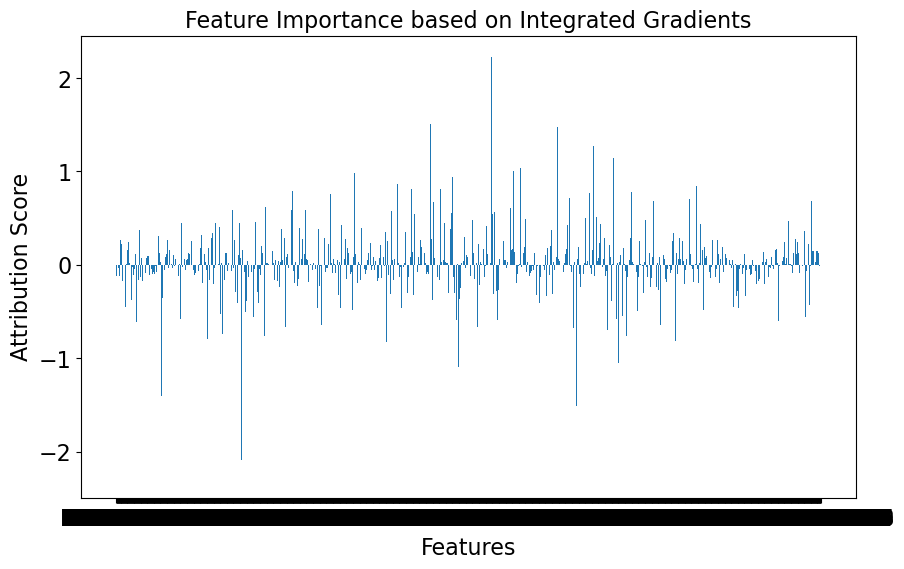

In [64]:
ig = IntegratedGradients(model)
print(X_train.shape)
baseline = torch.zeros_like(torch.from_numpy(X_train.astype(np.float32)))
attributions, delta = ig.attribute(torch.from_numpy(X_train.astype(np.float32)), baseline, target=0, return_convergence_delta=True)
print('IG Attributions:', attributions.shape)
print('Convergence Delta:', delta.shape)

# Visualize the attributions using a bar plot
def visualize_attributions(attributions):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(attributions)), attributions, tick_label=[f'Feature {i}' for i in range(len(attributions))])
    plt.xlabel('Features')
    plt.ylabel('Attribution Score')
    plt.title('Feature Importance based on Integrated Gradients')
    plt.show()

attributions = attributions.detach().numpy().flatten()
visualize_attributions(attributions)

In [65]:
# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

ig = IntegratedGradients(model)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

In [66]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))

ig_attr_test = ig.attribute(X_test_tensor, n_steps=50)
ig_nt_attr_test = ig_nt.attribute(X_test_tensor)
dl_attr_test = dl.attribute(X_test_tensor)
gs_attr_test = gs.attribute(X_test_tensor, X_train_tensor)
fa_attr_test = fa.attribute(X_test_tensor)

/home/tony/anaconda3/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/tony/anaconda3/lib/python3.11/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


13


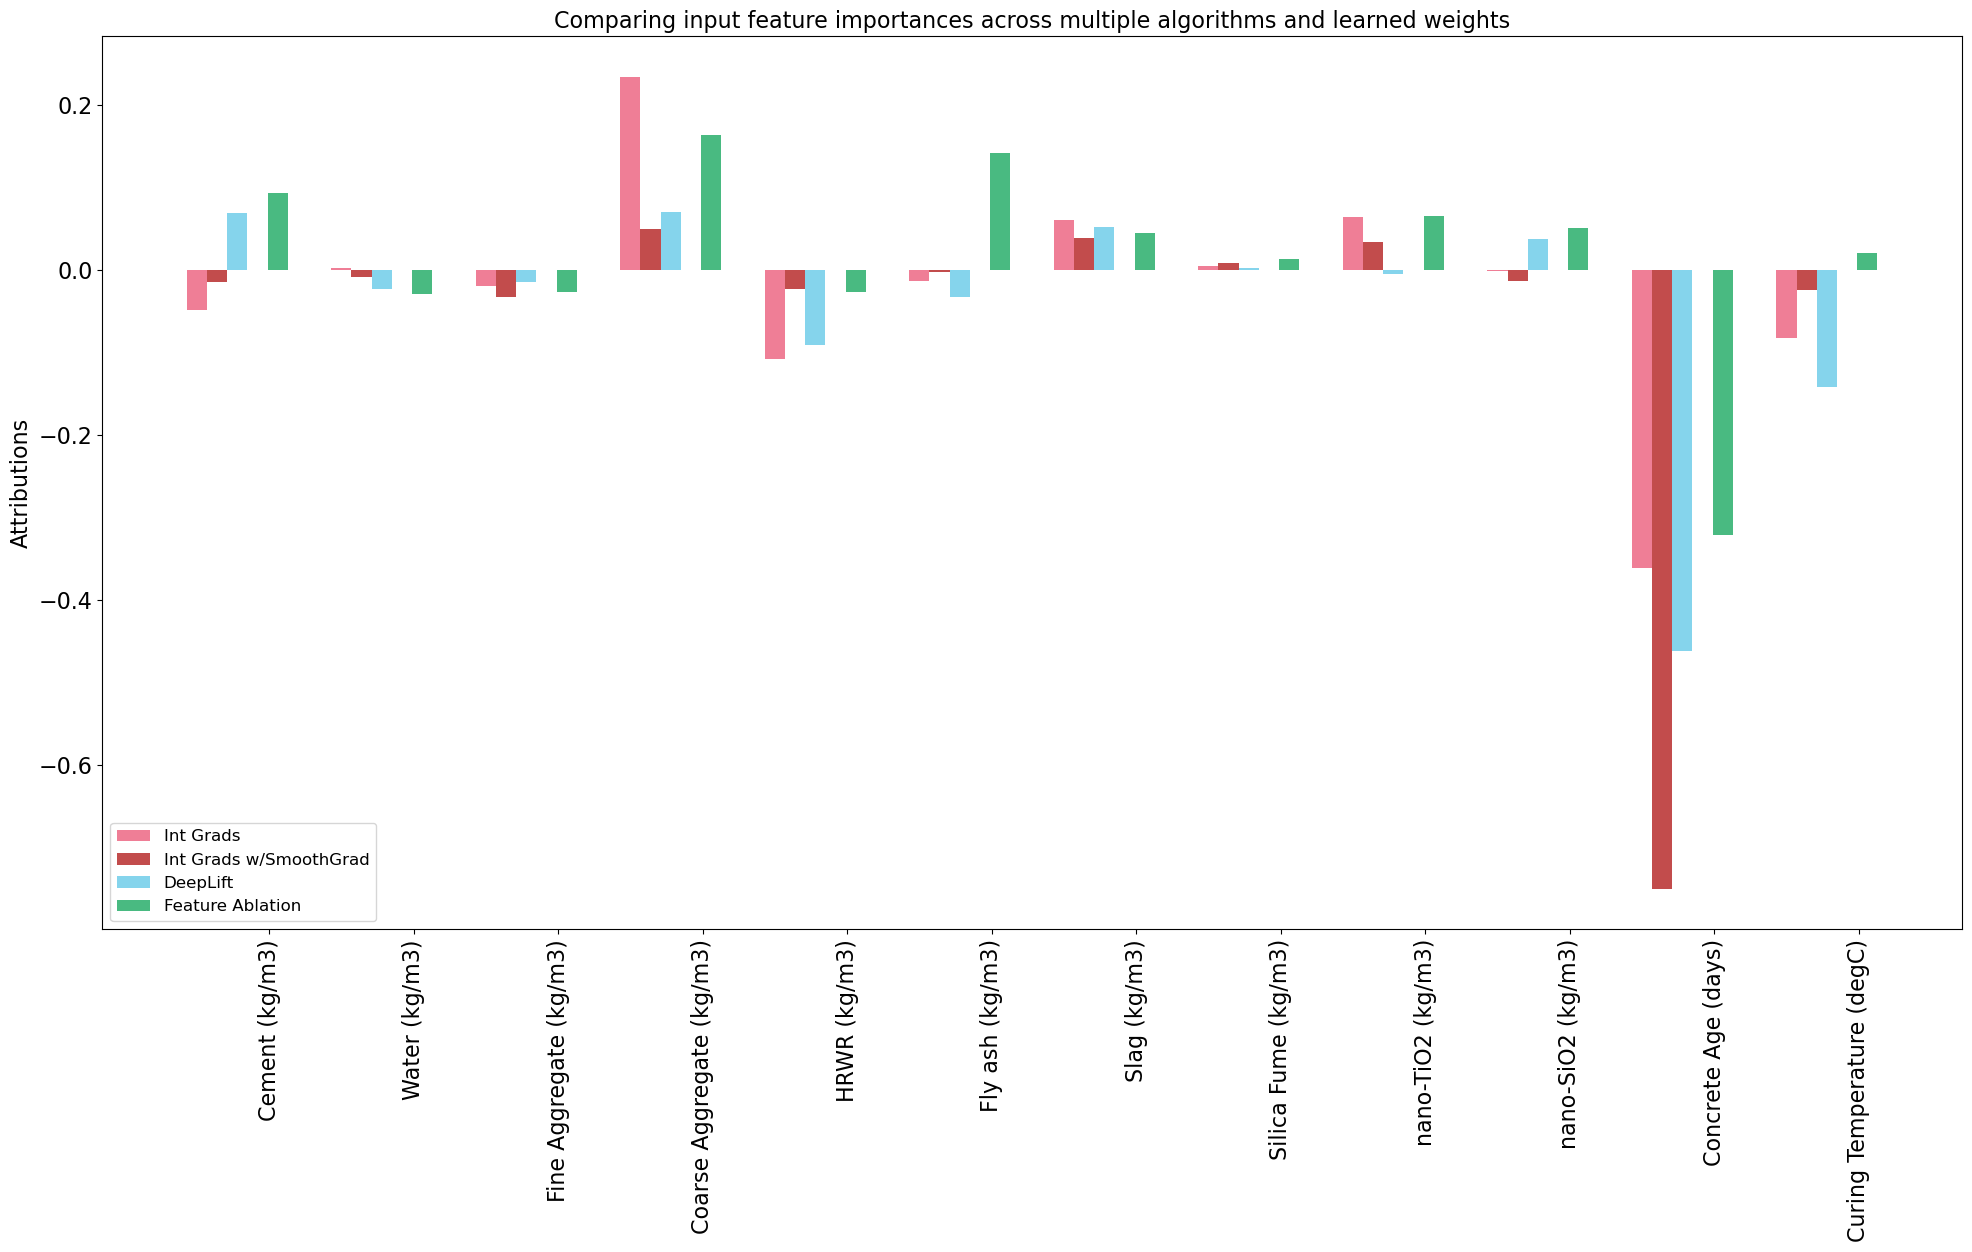

In [67]:
# prepare attributions for visualization
feature_names = column_names
print(len(feature_names))

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(0)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

# gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
# gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

# lin_weight = model.Linear.weight[0].detach().numpy()
# y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
# legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation', 'Weights']
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift',  'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_nt_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
# ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
# ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels, rotation=90)

plt.legend(legends, loc=3)
plt.show()